In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
#from scipy.stats import norm
import sklearn
import statsmodels.api as sm

import datetime
%matplotlib inline

#sns.set(style="dark")
plt.style.use("ggplot")
import json

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving a.csv to a (2).csv
Saving b.csv to b (2).csv
Saving c.csv to c (2).csv
Saving d.csv to d (2).csv
Saving e.csv to e (2).csv


In [ ]:
#reads CSVs as pd df
a = pd.read_csv('a.csv')
b = pd.read_csv('b.csv')
c = pd.read_csv('c.csv')
d = pd.read_csv('d.csv')
e = pd.read_csv('e.csv')

In [ ]:
#only run if first column is blank column

a = pd.read_csv('a.csv').iloc[: , 1:]
b = pd.read_csv('b.csv').iloc[: , 1:]
c = pd.read_csv('c.csv').iloc[: , 1:]
d = pd.read_csv('d.csv').iloc[: , 1:]
e = pd.read_csv('e.csv').iloc[: , 1:]

In [ ]:
# adding a column for total earnings

a.insert(5, 'TE', a['AE'].values + a['BE'].values + a['LE'].values)
b.insert(5, 'TE', b['AE'].values + b['BE'].values + b['LE'].values)
c.insert(5, 'TE', c['AE'].values + c['BE'].values + c['LE'].values)
d.insert(5, 'TE', d['AE'].values + d['BE'].values + d['LE'].values)
e.insert(5, 'TE', e['AE'].values + e['BE'].values + e['LE'].values)

In [ ]:
# adding a column for time spent on tasks

a.insert(1, 'AT', a['T'].diff(1).fillna(0))
b.insert(1, 'AT', b['T'].diff(1).fillna(0))
c.insert(1, 'AT', c['T'].diff(1).fillna(0))
d.insert(1, 'AT', d['T'].diff(1).fillna(0))
e.insert(1, 'AT', e['T'].diff(1).fillna(0))

In [ ]:
a.head()

,T,AT,A,AE,BE,LE,TE
0,0,0.0,S,0.0,0.0,0.0,0.0
1,1,1.0,CL,0.0,0.0,0.0,0.0
2,5,4.0,LLB,0.0,0.0,0.3,0.3
3,7,2.0,CA,0.0,0.0,0.3,0.3
4,8,1.0,PA,0.0,0.0,0.3,0.3


# Functions for summary stats

In [ ]:
#adds a column to dataframe that includes Layman's terms of action taken

def map_actions(df):
  action_codes = {
      "S": "Start Game",
      "EG": "Ended game early using the End Game Button",
      "CL": "Clicked on the leisure button",
      "LLB": "Left leisure page using back button",
      "RL": "Resumed leisure after being idle for 10 seconds",
      "CA": "Clicked on the active button",
      "PA": "Picked company A after choosing active",
      "AAB": "Accepted a trip with company A before starting a trip (starts a new trip)",
      "SAB": "Switched to company A before starting a trip",
      "SAA": "Switched to company A after finishing a trip (starts a new trip)",
      "CAA": "Continue with company A after finishing a trip (starts a new trip)",
      "BA": "Received bonus for company A",
      "PB": "Picked company B after choosing active",
      "ABB": "Accepted a trip with company B before starting a trip",
      "SBB": "Switched to company B before starting a trip",
      "SBA": "Switched to company B after finishing a trip (starts a new trip)",
      "CBA": "Continue with company B after finishing a trip (starts a new trip)",
      "BB": "Received bonus for company B",
      "FT0": "Failed trip for company A",
      "FT1": "Failed trip for company B",
      "ST0": "Successfully finished trip for company A",
      "ST1": "Successfully finished trip for company B",
      "M1": "Made mistake on right",
      "M2": "Made mistake on left",
      "M3": "Made mistake on down",
      "M4": "Made mistake on up",
      "M5": "Made mistake on stop",
      "M6": "Made mistake on red",
      "M7": "Made mistake on yellow",
      "M8": "Made mistake on green"
      }
      
  df['action']= df['A'].map(action_codes)
  return df

In [ ]:
dfs = [a, b, c, d, e]
for i in dfs:
  map_actions(i)

In [ ]:
#Gets the value counts of each action
def action_counts(df):
  return df.action.value_counts()

In [ ]:
#Returns the total number of mistakes made in the 25.5 period

def mistake_count(df):
  # count rows containing the word "mistake"
  count = (df["action"].str.contains("mistake")).sum()
  return count

In [ ]:
#Returns rows with details of all mistakes that were made
def all_mistakes(df):
  return df[df["action"].str.contains("mistake")]

In [ ]:
def companyA_completed(df):
  return (df["A"].str.contains("ST0")).sum()

def companyB_completed(df):
  return (df["A"].str.contains("ST1")).sum()

def companyA_failed(df):
  return (df["A"].str.contains("FT0")).sum()

def companyB_failed(df):
  return (df["A"].str.contains("FT1")).sum()


def ride_completions(df):
  a_complete = companyA_completed(df)
  b_complete = companyB_completed(df)
  a_failed = companyA_failed(df)
  b_failed = companyB_failed(df)

  company = ['Company A', 'Company B']
  result = ['Completed', 'Failed']
  df = pd.DataFrame([[a_complete, a_failed], [b_complete,b_failed]], company, result)
  return df


In [ ]:
def plot_earnings(df):

  # setting up switches to be plotted 

  switch = df[['T', 'A']]

  switch['A2B'] = switch['A'].apply(lambda x: int(x in ['SBA', 'SBB'])).values 
  a2b = switch.loc[switch['A2B'] == 1]['T'].values

  switch['B2A'] = switch['A'].apply(lambda x: int(x in ['SAA', 'SAB'])).values
  b2a = switch.loc[switch['B2A'] == 1]['T'].values

  switch['2L'] = switch['A'].apply(lambda x: int(x in ['CL'])).values
  l = switch.loc[switch['2L'] == 1]['T'].values

  
  plt.vlines(x = a2b, color = 'blue', linestyle = ':', label = 'Switch from A to B', ymin = 0, ymax = max(df['TE']))
  plt.vlines(x = b2a, color = 'red', linestyle = ':', label = 'Switch from B to A', ymin = 0, ymax = max(df['TE']))
  plt.vlines(x = l, color = 'green', linestyle = ':', label = 'To Leisure', ymin = 0, ymax = max(df['TE']))

  plt.plot(df['T'], df['AE'], color = 'red', label = 'Company A Earnings')
  plt.plot(df['T'], df['BE'], color = 'blue', label = 'Company B Earnings')
  plt.plot(df['T'], df['LE'], color = 'green', label = 'Leisure Earnings')
  plt.plot(df['T'], df['TE'], color = 'black', label = 'Total Earnings')
  plt.title('Earnings Over Time')
  plt.xlabel('Time')
  plt.ylabel('Earnings')
  plt.legend()

In [ ]:
def total_earnings(dfs):
  ae = np.array([sum([df['AE'].values[-1] for df in dfs])])
  be = np.array([sum([df['BE'].values[-1] for df in dfs])])
  le = np.array([sum([df['LE'].values[-1] for df in dfs])])
  te = np.array([sum([df['TE'].values[-1] for df in dfs])])
  return pd.DataFrame(data = np.array([ae, be, le, te]).T, columns = ['AE', 'BE', 'LE', 'TE'])

In [ ]:
def curr_trip(df):
  # Define the conditions
  cond1 = df['A'].str.contains('AAB')
  cond2 = df['A'].str.contains('ABB')
  cond3 = df['A'].str.contains('ST0|FT0')
  cond4 = df['A'].str.contains('ST1|FT1')

# Apply the conditions and create the new column
  df['curr_trip'] = ''
  df.loc[cond1 | cond3, 'new_col'] = 'A'
  df.loc[cond2 | cond4, 'new_col'] = 'B'

  return df

In [ ]:
def time_spent(df):
  missing = df[['A', 'AT']].groupby('A').sum('AT').reset_index().sort_values(by = 'AT', ascending = False)
  # imputing 0s for any missing actions 
  actions = ["S", "EG", "CL", "LLB", "RL","CA", "PA", "AAB", "SAB", "SAA", "CAA", "BA", "PB", "ABB", "SBB", "SBA",
             "CBA", "BB", "FT0", "FT1", "ST0", "ST1", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"]
  for action in actions:
    if action not in missing['A'].values:
      missing.loc[len(missing.index)] = [action, 0]

  missing = map_actions(missing)
  return missing

In [ ]:
def time_spent_A(df):

  # uses the the time_spent(df) as an input to easily count the times 

  return df[df['A'] == 'AAB']['AT'].values[0] + df[df['A'] == 'SAB']['AT'].values[0] + df[df['A'] == 'SAA']['AT'].values[0] + df[
      df['A'] == 'CAA']['AT'].values[0] + df[df['A'] == 'BA']['AT'].values[0] + df[df['A'] == 'FT0']['AT'].values[0] + df[df['A'] == 'ST0']['AT'].values[0]+ df[
          df['A'] == 'M1']['AT'].values[0] + df[df['A'] == 'M2']['AT'].values[0] + df[df['A'] == 'M3']['AT'].values[0] + df[df['A'] == 'M4']['AT'].values[0] + df[
              df['A'] == 'M5']['AT'].values[0] + df[df['A'] == 'M6']['AT'].values[0] + df[df['A'] == 'M7']['AT'].values[0] + df[df['A'] == 'M8']['AT'].values[0]

def time_spent_B(df):
  return df[df['A'] == 'ABB']['AT'].values[0] + df[df['A'] == 'SBB']['AT'].values[0] + df[df['A'] == 'SBA']['AT'].values[0] + df[
      df['A'] == 'CBA']['AT'].values[0] + df[df['A'] == 'BB']['AT'].values[0] + df[df['A'] == 'FT1']['AT'].values[0] + df[df['A'] == 'ST1']['AT'].values[0]+ df[
          df['A'] == 'M1']['AT'].values[0] + df[df['A'] == 'M2']['AT'].values[0] + df[df['A'] == 'M3']['AT'].values[0] + df[df['A'] == 'M4']['AT'].values[0] + df[
              df['A'] == 'M5']['AT'].values[0] + df[df['A'] == 'M6']['AT'].values[0] + df[df['A'] == 'M7']['AT'].values[0] + df[df['A'] == 'M8']['AT'].values[0]


In [ ]:
# how to include mistakes in these (CURRENTLY NOT IN USE)

def is_company_A(df):
  a = ['AAB', 'SAB', 'SAA', 'CAA', 'BA', 'FT0', 'ST0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
  df['Company A?'] = df['A'].apply(lambda x: x in a)

In [ ]:
# how to include mistakes in these (CURRENTLY NOT IN USE)

def is_company_B(df):
  b = ['ABB', 'SBB', 'SBA', 'CBA', 'BB', 'FT1', 'ST1', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
  df['Company A?'] = df['A'].apply(lambda x: x in a)

In [ ]:
def plot_decision_time(df):
  # we track the time taken for a decision in AT, so we just want to find the AT for each relevant decision 

  decision_df = df.copy()[['T', 'AT', 'A']]
  decisions = ['AAB', 'SAB', 'SAA', 'CAA', 'BA', 'ABB', 'SBB', 'SBA', 'CBA', 'BB', 'CL', 'LLB', 'PA', 'PB']
  decision_df = decision_df.loc[decision_df['A'].isin(decisions)]

  for i in range(len(decision_df)-1):
    
    # extract the values of T for the current and next row
    current_T = decision_df.iloc[i]['T'].astype(int)

    # generate a range of integers between the current and next T values
    new_T = range(current_T - decision_df.iloc[i]['AT'].astype(int), current_T+1)
    
    # create a new dataframe with the generated range of T values
    new_rows = pd.DataFrame({'T': new_T, 'AT': np.nan, 'A': np.nan})
    
    # append the new dataframe to the overall new dataframe
    decision_df = pd.concat([decision_df, new_rows])

  
  decision_df = decision_df.sort_values(by='T').ffill()

  decision_df['AT'].fillna(0, inplace = True)
  decision_df['A'].fillna('No Action', inplace = True)


  colors = {'AAB': 1, 'SAB': 2, 'SAA': 3, 'CAA': 4, 'BA': 5, 'ABB': 6, 'SBB': 7, 'SBA': 8, 'CBA': 9,
            'BB': 10, 'CL': 11, 'LLB': 12, 'PA': 13, 'PB': 14, 'No Action': 15}

  decision_df['Color'] = decision_df['A'].map(colors)

  plt.figure(figsize=(20, 6), dpi=80)

  plt.scatter(decision_df['T'], decision_df['A'], c = decision_df['Color'], marker = ',')


In [ ]:
def curr_trip(df):
  # Define the conditions
  cond1 = df['A'].str.contains('AAB|CAA')
  cond2 = df['A'].str.contains('ABB|SBA')
  cond3 = df['A'].str.contains('ST0|FT0')
  cond4 = df['A'].str.contains('ST1|FT1')
  cond5 = df['A'].str.contains('CL|LLB|RL')

  # Apply the conditions and create the new column
  #df['curr_trip'] = ''
  df.loc[cond1 | cond3, 'curr_trip'] = 'A'
  df.loc[cond2 | cond4, 'curr_trip'] = 'B'
  df.loc[cond5, 'curr_trip'] = 'L'

  return df


def plot_tripovertime(df):
  new_df = curr_trip(df)
  new_df = new_df[~new_df['curr_trip'].isna()][['T', 'curr_trip']]

  # iterate over each row in the original dataframe
  for i in range(len(new_df)-1):
      
      # extract the values of T for the current and next row
      current_T = new_df.iloc[i]['T']
      next_T = new_df.iloc[i+1]['T']

      # generate a range of integers between the current and next T values
      new_T = range(current_T+1, next_T)
      
      # create a new dataframe with the generated range of T values
      new_rows = pd.DataFrame({'T': new_T, 'curr_trip': np.nan})
      
      # append the new dataframe to the overall new dataframe
      new_df = pd.concat([new_df, new_rows])

  new_df = new_df.sort_values(by='T').ffill()


  colors = {'A': 1,
          'B': 2,
          'L': 3}
      
  new_df['color']= new_df['curr_trip'].map(colors)


  plt.figure(figsize=(20, 6), dpi=80)
  # plot data
  plt.scatter(new_df['T'], new_df['curr_trip'], s=2, marker=',', c=new_df['color'])

  # set plot labels and title
  plt.xlabel('Time')
  plt.ylabel('Company')
  plt.title('Driving Decision during Time')

  # show plot
  plt.show()

# Person A

In [ ]:
action_counts(a)

Successfully finished trip for company A                                     23
Successfully finished trip for company B                                     16
Continue with company A after finishing a trip (starts a new trip)           15
Resumed leisure after being idle for 10 seconds                               8
Clicked on the leisure button                                                 8
Switched to company B after finishing a trip (starts a new trip)              8
Accepted a trip with company B before starting a trip                         8
Accepted a trip with company A before starting a trip (starts a new trip)     8
Continue with company B after finishing a trip (starts a new trip)            6
Switched to company A after finishing a trip (starts a new trip)              6
Clicked on the active button                                                  4
Picked company A after choosing active                                        3
Switched to company B before starting a 

In [ ]:
mistake_count(a)

5

In [ ]:
all_mistakes(a)

,T,AT,A,AE,BE,LE,TE,action
6,28,12.0,M4,0.0,0.00,0.3,0.30,Made mistake on up
7,33,5.0,M1,0.0,0.00,0.3,0.30,Made mistake on right
8,35,2.0,M8,0.0,0.00,0.3,0.30,Made mistake on green
15,121,5.0,M6,0.0,12.46,0.3,12.76,Made mistake on red
89,987,50.0,M8,186.3,126.31,8.4,321.01,Made mistake on green


In [ ]:
ride_completions(a)

,Completed,Failed
Company A,23,1
Company B,16,1


In [ ]:
# showing error with the data tracking 

a[a['T'] > 240]

,T,AT,A,AE,BE,LE,TE,action
22,243,31.0,ST1,53.17,25.39,0.3,78.86,Successfully finished trip for company B
23,249,6.0,SBA,53.17,25.39,0.3,78.86,Switched to company B after finishing a trip (...
24,259,10.0,ST1,53.17,29.09,0.3,82.56,Successfully finished trip for company B
25,262,3.0,SBA,53.17,29.09,0.3,82.56,Switched to company B after finishing a trip (...
26,278,16.0,ST1,53.17,32.21,0.3,85.68,Successfully finished trip for company B
...,...,...,...,...,...,...,...,...
125,1481,24.0,ST0,435.23,142.93,13.4,591.56,Successfully finished trip for company A
126,1483,2.0,CAA,435.23,142.93,13.4,591.56,Continue with company A after finishing a trip...
127,1505,22.0,ST0,441.33,142.93,13.4,597.66,Successfully finished trip for company A
128,1509,4.0,CAA,441.33,142.93,13.4,597.66,Continue with company A after finishing a trip...


<ipython-input-19-bbc32bb5718a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['A2B'] = switch['A'].apply(lambda x: int(x in ['SBA', 'SBB'])).values
<ipython-input-19-bbc32bb5718a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['B2A'] = switch['A'].apply(lambda x: int(x in ['SAA', 'SAB'])).values
<ipython-input-19-bbc32bb5718a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

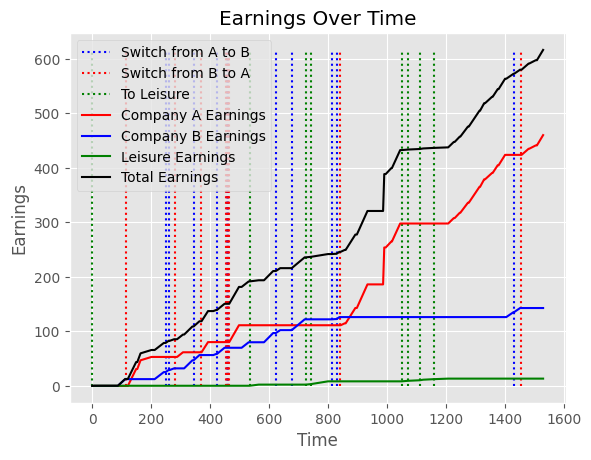

In [ ]:
plot_earnings(a)

In [ ]:
time_spent(a)

,A,AT,action
21,ST0,527.0,Successfully finished trip for company A
22,ST1,345.0,Successfully finished trip for company B
5,CL,129.0,Clicked on the leisure button
15,RL,94.0,Resumed leisure after being idle for 10 seconds
12,M8,52.0,Made mistake on green
2,CA,48.0,Clicked on the active button
3,CAA,46.0,Continue with company A after finishing a trip...
4,CBA,40.0,Continue with company B after finishing a trip...
1,ABB,39.0,Accepted a trip with company B before starting...
6,FT0,38.0,Failed trip for company A


In [ ]:
# time spent in each Company:

print(f'Time spent in Company A (in seconds): {time_spent_A(time_spent(a))}')
print(f'Time spent in Company B (in seconds): {time_spent_B(time_spent(a))}')

Time spent in Company A (in seconds): 737.0
Time spent in Company B (in seconds): 583.0


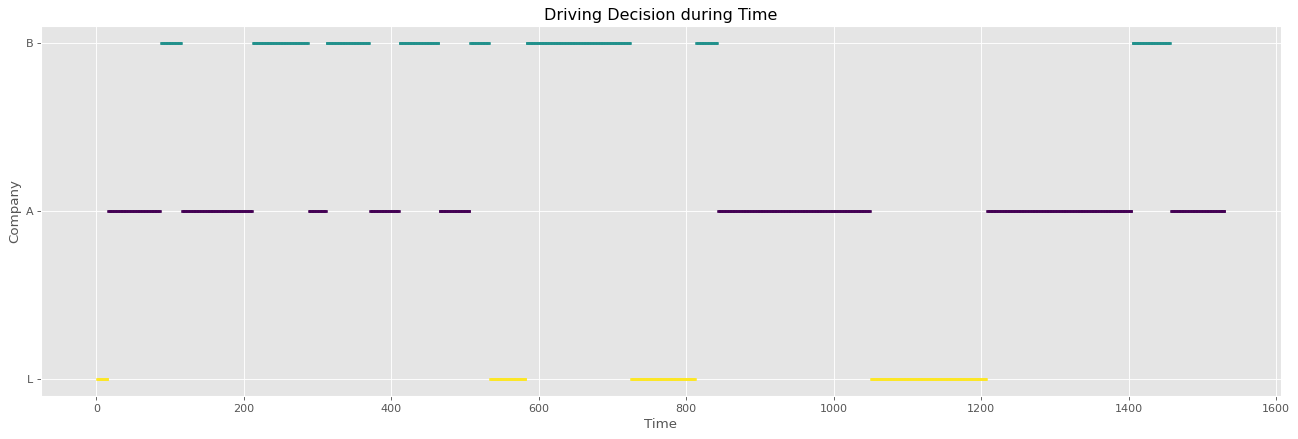

In [ ]:
plot_tripovertime(a)

# Person B

In [ ]:
action_counts(b)

Clicked on the leisure button                                                7
Clicked on the active button                                                 2
Successfully finished trip for company B                                     2
Successfully finished trip for company A                                     2
Start Game                                                                   1
Picked company A after choosing active                                       1
Switched to company B before starting a trip                                 1
Accepted a trip with company B before starting a trip                        1
Switched to company B after finishing a trip (starts a new trip)             1
Made mistake on yellow                                                       1
Switched to company A after finishing a trip (starts a new trip)             1
Accepted a trip with company A before starting a trip (starts a new trip)    1
Continue with company A after finishing a trip (star

In [ ]:
mistake_count(b)

1

In [ ]:
all_mistakes(b)

,T,AT,A,AE,BE,LE,TE,action
7,31,2.0,M7,0.0,9.34,0,9.34,Made mistake on yellow


In [ ]:
ride_completions(b)

,Completed,Failed
Company A,2,0
Company B,2,0


<ipython-input-19-bbc32bb5718a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['A2B'] = switch['A'].apply(lambda x: int(x in ['SBA', 'SBB'])).values
<ipython-input-19-bbc32bb5718a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['B2A'] = switch['A'].apply(lambda x: int(x in ['SAA', 'SAB'])).values
<ipython-input-19-bbc32bb5718a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

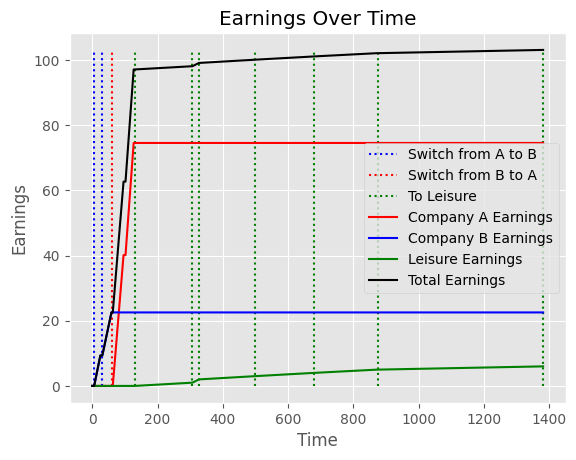

In [ ]:
plot_earnings(b)

In [ ]:
time_spent(b)

,A,AT,action
4,CL,1060.0,Clicked on the leisure button
2,CA,195.0,Clicked on the active button
12,ST0,58.0,Successfully finished trip for company A
13,ST1,47.0,Successfully finished trip for company B
3,CAA,6.0,Continue with company A after finishing a trip...
10,SBA,4.0,Switched to company B after finishing a trip (...
9,SAA,3.0,Switched to company A after finishing a trip (...
1,ABB,2.0,Accepted a trip with company B before starting...
5,M7,2.0,Made mistake on yellow
0,AAB,1.0,Accepted a trip with company A before starting...


In [ ]:
# time spent in each Company:

print(f'Time spent in Company A (in seconds): {time_spent_A(time_spent(b))}')
print(f'Time spent in Company B (in seconds): {time_spent_B(time_spent(b))}')

Time spent in Company A (in seconds): 70.0
Time spent in Company B (in seconds): 56.0


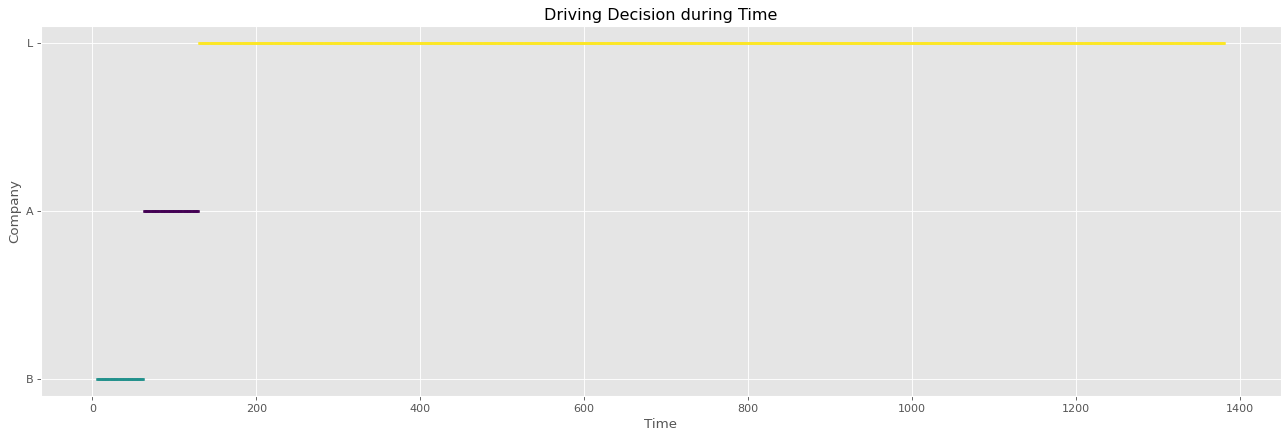

In [ ]:
plot_tripovertime(b)

# Person C

In [ ]:
action_counts(c)

Resumed leisure after being idle for 10 seconds                              60
Clicked on the leisure button                                                23
Successfully finished trip for company A                                     12
Left leisure page using back button                                           9
Continue with company A after finishing a trip (starts a new trip)            7
Clicked on the active button                                                  6
Accepted a trip with company A before starting a trip (starts a new trip)     5
Picked company A after choosing active                                        3
Picked company B after choosing active                                        3
Successfully finished trip for company B                                      3
Made mistake on down                                                          2
Made mistake on red                                                           2
Made mistake on stop                    

In [ ]:
mistake_count(c)

8

In [ ]:
all_mistakes(c)

,T,AT,A,AE,BE,LE,TE,action
9,47,17.0,M6,0.00,0.00,1.7,1.70,Made mistake on red
12,78,4.0,M3,36.50,0.00,1.7,38.20,Made mistake on down
15,111,4.0,M6,67.49,0.00,1.7,69.19,Made mistake on red
16,114,3.0,M5,67.49,0.00,1.7,69.19,Made mistake on stop
27,178,5.0,M1,75.50,8.30,3.9,87.70,Made mistake on right
33,221,3.0,M4,75.50,21.47,3.9,100.87,Made mistake on up
48,326,12.0,M5,99.54,21.47,7.8,128.81,Made mistake on stop
73,509,9.0,M3,135.97,21.47,18.3,175.74,Made mistake on down


In [ ]:
ride_completions(c)

,Completed,Failed
Company A,12,0
Company B,3,0


<ipython-input-19-bbc32bb5718a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['A2B'] = switch['A'].apply(lambda x: int(x in ['SBA', 'SBB'])).values
<ipython-input-19-bbc32bb5718a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['B2A'] = switch['A'].apply(lambda x: int(x in ['SAA', 'SAB'])).values
<ipython-input-19-bbc32bb5718a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

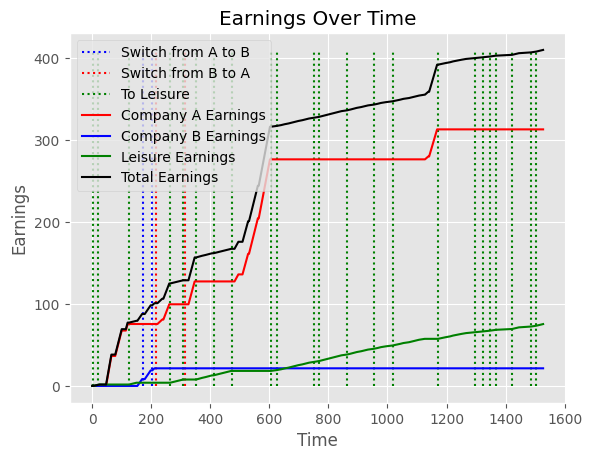

In [ ]:
plot_earnings(c)

In [ ]:
time_spent(c)

,A,AT,action
13,RL,721.0,Resumed leisure after being idle for 10 seconds
4,CL,358.0,Clicked on the leisure button
18,ST0,241.0,Successfully finished trip for company A
19,ST1,44.0,Successfully finished trip for company B
3,CAA,34.0,Continue with company A after finishing a trip...
5,LLB,29.0,Left leisure page using back button
10,M6,21.0,Made mistake on red
0,AAB,16.0,Accepted a trip with company A before starting...
9,M5,15.0,Made mistake on stop
7,M3,13.0,Made mistake on down


In [ ]:
# time spent in each Company:

print(f'Time spent in Company A (in seconds): {time_spent_A(time_spent(c))}')
print(f'Time spent in Company B (in seconds): {time_spent_B(time_spent(c))}')

Time spent in Company A (in seconds): 356.0
Time spent in Company B (in seconds): 111.0


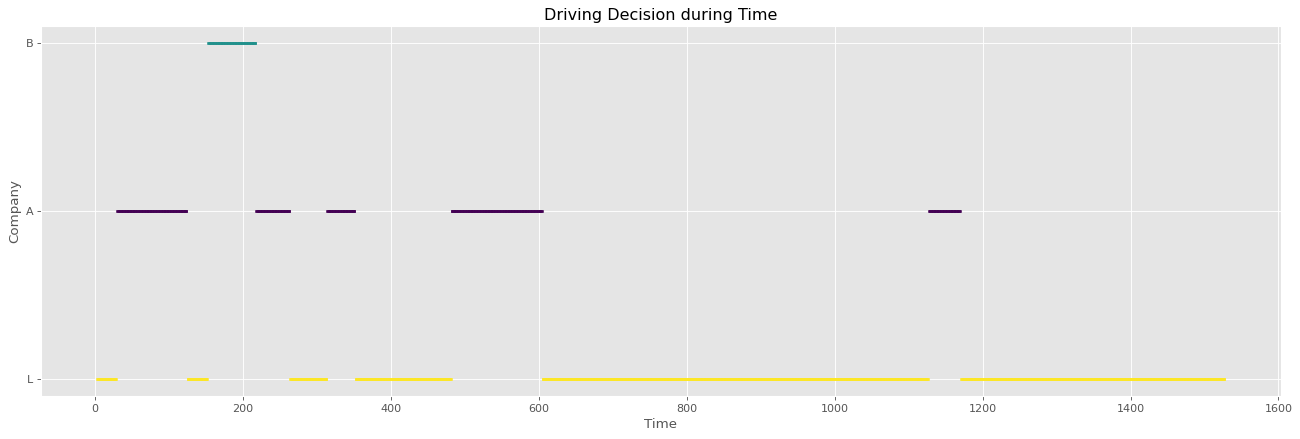

In [ ]:
plot_tripovertime(c)

# Person D

In [ ]:
action_counts(d)

Successfully finished trip for company A                                     33
Continue with company A after finishing a trip (starts a new trip)           24
Successfully finished trip for company B                                     21
Switched to company B after finishing a trip (starts a new trip)             14
Accepted a trip with company A before starting a trip (starts a new trip)     9
Accepted a trip with company B before starting a trip                         7
Continue with company B after finishing a trip (starts a new trip)            7
Switched to company A after finishing a trip (starts a new trip)              6
Left leisure page using back button                                           6
Clicked on the leisure button                                                 6
Clicked on the active button                                                  5
Made mistake on left                                                          5
Made mistake on yellow                  

In [ ]:
mistake_count(d)

15

In [ ]:
all_mistakes(d)

,T,AT,A,AE,BE,LE,TE,action
11,46,29.0,M2,0.00,0.00,0.4,0.40,Made mistake on left
17,83,2.0,M5,36.50,9.34,0.4,46.24,Made mistake on stop
18,86,3.0,M3,36.50,9.34,0.4,46.24,Made mistake on down
19,107,21.0,M2,36.50,9.34,0.4,46.24,Made mistake on left
20,109,2.0,M7,36.50,9.34,0.4,46.24,Made mistake on yellow
53,350,15.0,M7,111.76,56.51,1.4,169.67,Made mistake on yellow
64,422,15.0,M2,148.19,56.51,2.0,206.70,Made mistake on left
69,506,27.0,M2,216.52,56.51,2.0,275.03,Made mistake on left
87,687,8.0,M2,284.24,106.47,3.0,393.71,Made mistake on left
88,694,7.0,M7,284.24,106.47,3.0,393.71,Made mistake on yellow


In [ ]:
ride_completions(d)

,Completed,Failed
Company A,33,0
Company B,21,0


<ipython-input-19-bbc32bb5718a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['A2B'] = switch['A'].apply(lambda x: int(x in ['SBA', 'SBB'])).values
<ipython-input-19-bbc32bb5718a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['B2A'] = switch['A'].apply(lambda x: int(x in ['SAA', 'SAB'])).values
<ipython-input-19-bbc32bb5718a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

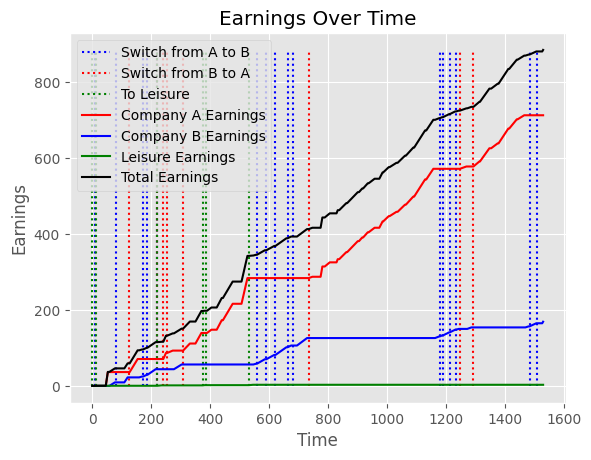

In [ ]:
plot_earnings(d)

In [ ]:
time_spent(d)

,A,AT,action
22,ST0,677.0,Successfully finished trip for company A
23,ST1,374.0,Successfully finished trip for company B
8,M2,100.0,Made mistake on left
3,CAA,85.0,Continue with company A after finishing a trip...
20,SBA,46.0,Switched to company B after finishing a trip (...
18,SAA,31.0,Switched to company A after finishing a trip (...
12,M6,31.0,Made mistake on red
4,CBA,24.0,Continue with company B after finishing a trip...
13,M7,24.0,Made mistake on yellow
16,RL,22.0,Resumed leisure after being idle for 10 seconds


In [ ]:
# time spent in each Company:

print(f'Time spent in Company A (in seconds): {time_spent_A(time_spent(d))}')
print(f'Time spent in Company B (in seconds): {time_spent_B(time_spent(d))}')

Time spent in Company A (in seconds): 1011.0
Time spent in Company B (in seconds): 662.0


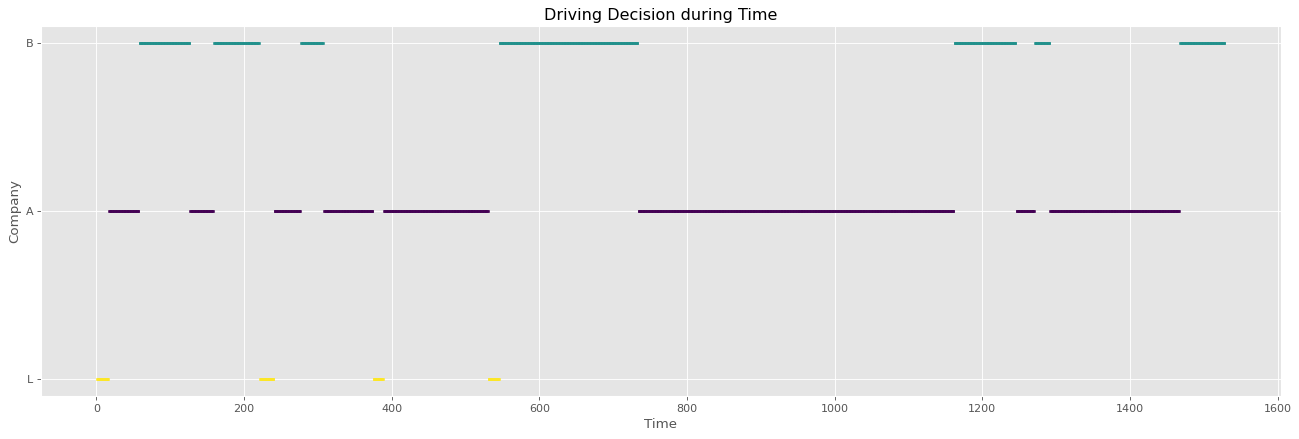

In [ ]:
plot_tripovertime(d)

# Person E

In [ ]:
action_counts(e)

Resumed leisure after being idle for 10 seconds                              49
Successfully finished trip for company A                                     17
Accepted a trip with company A before starting a trip (starts a new trip)    10
Clicked on the leisure button                                                 9
Continue with company A after finishing a trip (starts a new trip)            7
Picked company A after choosing active                                        6
Continue with company B after finishing a trip (starts a new trip)            6
Clicked on the active button                                                  6
Left leisure page using back button                                           5
Accepted a trip with company B before starting a trip                         4
Switched to company A after finishing a trip (starts a new trip)              3
Failed trip for company B                                                     3
Successfully finished trip for company B

In [ ]:
mistake_count(e)

3

In [ ]:
all_mistakes(e)

,T,AT,A,AE,BE,LE,TE,action
4,38,28.0,M3,0.00,0.00,0.0,0.00,Made mistake on down
11,106,26.0,M4,36.50,11.94,0.0,48.44,Made mistake on up
33,312,3.0,M6,139.28,26.00,3.6,168.88,Made mistake on red


In [ ]:
ride_completions(e)

,Completed,Failed
Company A,17,0
Company B,3,3


<ipython-input-19-bbc32bb5718a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['A2B'] = switch['A'].apply(lambda x: int(x in ['SBA', 'SBB'])).values
<ipython-input-19-bbc32bb5718a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch['B2A'] = switch['A'].apply(lambda x: int(x in ['SAA', 'SAB'])).values
<ipython-input-19-bbc32bb5718a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

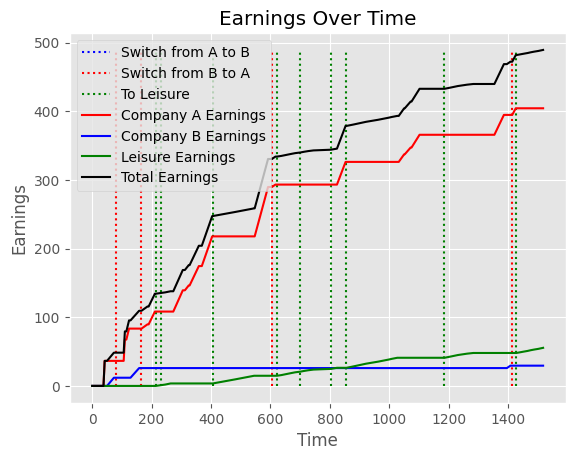

In [ ]:
plot_earnings(e)

In [ ]:
time_spent(e)

,A,AT,action
12,RL,603.0,Resumed leisure after being idle for 10 seconds
16,ST0,364.0,Successfully finished trip for company A
5,CL,107.0,Clicked on the leisure button
0,AAB,75.0,Accepted a trip with company A before starting...
6,FT1,75.0,Failed trip for company B
17,ST1,64.0,Successfully finished trip for company B
2,CA,35.0,Clicked on the active button
3,CAA,31.0,Continue with company A after finishing a trip...
4,CBA,29.0,Continue with company B after finishing a trip...
7,LLB,28.0,Left leisure page using back button


In [ ]:
# time spent in each Company:

print(f'Time spent in Company A (in seconds): {time_spent_A(time_spent(e))}')
print(f'Time spent in Company B (in seconds): {time_spent_B(time_spent(e))}')

Time spent in Company A (in seconds): 551.0
Time spent in Company B (in seconds): 235.0


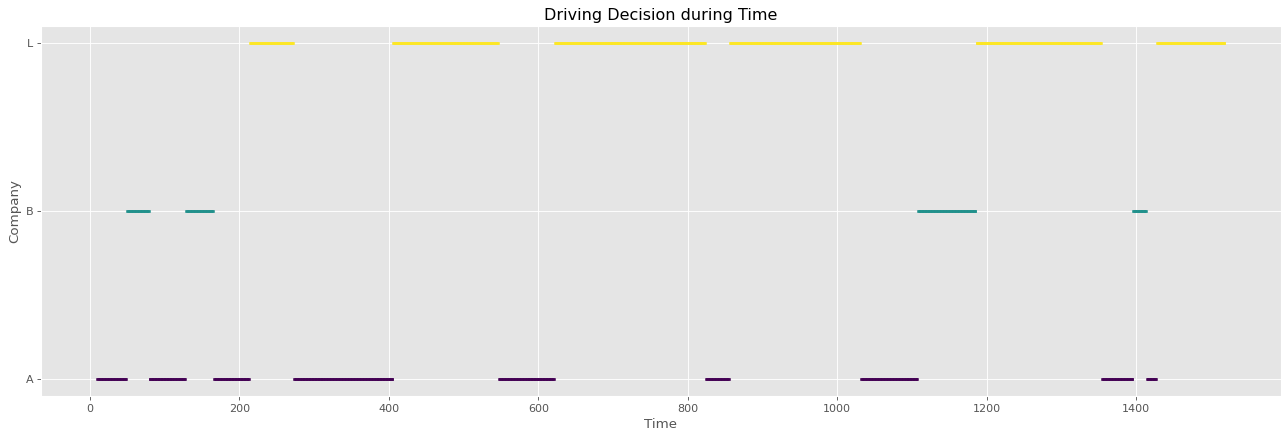

In [ ]:
plot_tripovertime(e)

## General Statistics

In [ ]:
# total ride statistics

ride_completions(a) + ride_completions(b) + ride_completions(c) + ride_completions(d) + ride_completions(e)

,Completed,Failed
Company A,87,1
Company B,45,4


In [ ]:
# total earnings 

total_earnings(dfs)

,AE,BE,LE,TE
0,1965.53,385.7,153.3,2504.53


In [ ]:
# total time spent per company

print(f'Time spent in Company A (in seconds): {sum([time_spent_A(time_spent(df)) for df in dfs])}')
print(f'Time spent in Company B (in seconds): {sum([time_spent_B(time_spent(df)) for df in dfs])}')

Time spent in Company A (in seconds): 2725.0
Time spent in Company B (in seconds): 1647.0
